# Customer Churn Prediction



Importing necessary files

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('telecom_customer_churn.csv')

In [4]:
df.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


Overviewing all the columns in the dataset

In [5]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [6]:
df1 = df.copy()

Creating a copy of the Dataset

In [7]:
df1.head(7)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,0013-MHZWF,Female,23,No,3,Midpines,95345,37.581496,-119.972762,0,...,Credit Card,69.4,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
6,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,34.757477,-120.550507,1,...,Bank Withdrawal,109.7,7904.25,0.00,0,707.16,8611.41,Stayed,NaN,NaN


In [8]:
df1.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

# Exploratory Data Analysis

## Data Preprocessing

Dropping unwanted columns from the dataset

In [9]:
df1.drop(['Customer ID','Total Refunds','Zip Code','Latitude', 'Longitude','Churn Category', 'Churn Reason'],axis='columns',inplace=True)


In [10]:
df1.shape

(7043, 31)

In [11]:
df1.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract  

Checking the number of unique values in each column

In [12]:
features = df1.columns
for feature in features:
     print(f'{feature}--->{df[feature].nunique()}')

Gender--->2
Age--->62
Married--->2
Number of Dependents--->10
City--->1106
Number of Referrals--->12
Tenure in Months--->72
Offer--->5
Phone Service--->2
Avg Monthly Long Distance Charges--->3583
Multiple Lines--->2
Internet Service--->2
Internet Type--->3
Avg Monthly GB Download--->49
Online Security--->2
Online Backup--->2
Device Protection Plan--->2
Premium Tech Support--->2
Streaming TV--->2
Streaming Movies--->2
Streaming Music--->2
Unlimited Data--->2
Contract--->3
Paperless Billing--->2
Payment Method--->3
Monthly Charge--->1591
Total Charges--->6540
Total Extra Data Charges--->16
Total Long Distance Charges--->6068
Total Revenue--->6975
Customer Status--->3


Getting the percentge of Null Values in each Column

In [13]:
df1.isnull().sum() / df1.shape[0]

Gender                               0.000000
Age                                  0.000000
Married                              0.000000
Number of Dependents                 0.000000
City                                 0.000000
Number of Referrals                  0.000000
Tenure in Months                     0.000000
Offer                                0.550476
Phone Service                        0.000000
Avg Monthly Long Distance Charges    0.096834
Multiple Lines                       0.096834
Internet Service                     0.000000
Internet Type                        0.216669
Avg Monthly GB Download              0.216669
Online Security                      0.216669
Online Backup                        0.216669
Device Protection Plan               0.216669
Premium Tech Support                 0.216669
Streaming TV                         0.216669
Streaming Movies                     0.216669
Streaming Music                      0.216669
Unlimited Data                    

Cleaning Function for the Dataset

In [14]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [15]:
df1=df1.interpolate()

C:\Users\BELDHARI SATVICK\AppData\Local\Temp\ipykernel_21848\3346565851.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df1=df1.interpolate()


In [16]:
df1=df1.dropna()
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [17]:
df['Unlimited Data'] 

0       Yes
1        No
2       Yes
3       Yes
4       Yes
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042    Yes
Name: Unlimited Data, Length: 7043, dtype: object

In [18]:
number_columns=['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

Checking the unique values of column having datatype: 'object'

In [19]:
def unique_values_names(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [20]:
unique_values_names(df1)

Gender:['Male' 'Female']
Married:['No' 'Yes']
City:['Costa Mesa' 'Martinez' 'Midpines' 'Lompoc' 'Napa' 'Simi Valley'
 'La Mesa' 'Woodlake' 'San Marcos' 'Alpaugh' 'Moss Beach' 'Stockton'
 'Los Angeles' 'Yermo' 'Fremont' 'El Portal' 'Calistoga' 'North Hollywood'
 'Inverness' 'Modesto' 'Kenwood' 'Morongo Valley' 'Palo Verde' 'Valyermo'
 'Monterey Park' 'Big Oak Flat' 'Glenhaven' 'Lodi' 'Fairfield' 'Moorpark'
 'Solvang' 'Del Rey' 'Armona' 'Mckinleyville' 'Calimesa' 'Garden Grove'
 'Indio' 'San Diego' 'Escondido' 'Chino' 'Calexico' 'Groveland'
 'Los Gatos' 'Clovis' 'Buellton' 'Midway City' 'Folsom' 'San Clemente'
 'Bodega Bay' 'Challenge' 'Ludlow' 'Santa Clara' 'Rescue' 'Lotus'
 'Harbor City' 'Death Valley' 'Riverdale' 'Claremont' 'Upland'
 'Santa Rosa' 'Long Beach' 'Samoa' 'Milford' 'Anderson' 'Orange'
 'San Francisco' 'Santa Cruz' 'Lake Hughes' 'Paramount'
 'San Juan Capistrano' 'Copperopolis' 'Cypress' 'Lancaster' 'San Ysidro'
 'Gilroy' 'San Jose' 'Stanford' 'Turlock' 'Los Alamitos' 'Enc

In [21]:
import plotly.express as px 

Visualizing Column 'Age' in the dataset

In [22]:
fig = px.histogram(df1, x = 'Age')
fig.show()

Checking the stats in number_columns of the copied dataset

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of Dependents'}>,
        <Axes: title={'center': 'Number of Referrals'}>],
       [<Axes: title={'center': 'Tenure in Months'}>,
        <Axes: title={'center': 'Avg Monthly Long Distance Charges'}>,
        <Axes: title={'center': 'Avg Monthly GB Download'}>],
       [<Axes: title={'center': 'Monthly Charge'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Extra Data Charges'}>],
       [<Axes: title={'center': 'Total Long Distance Charges'}>,
        <Axes: title={'center': 'Total Revenue'}>, <Axes: >]],
      dtype=object)

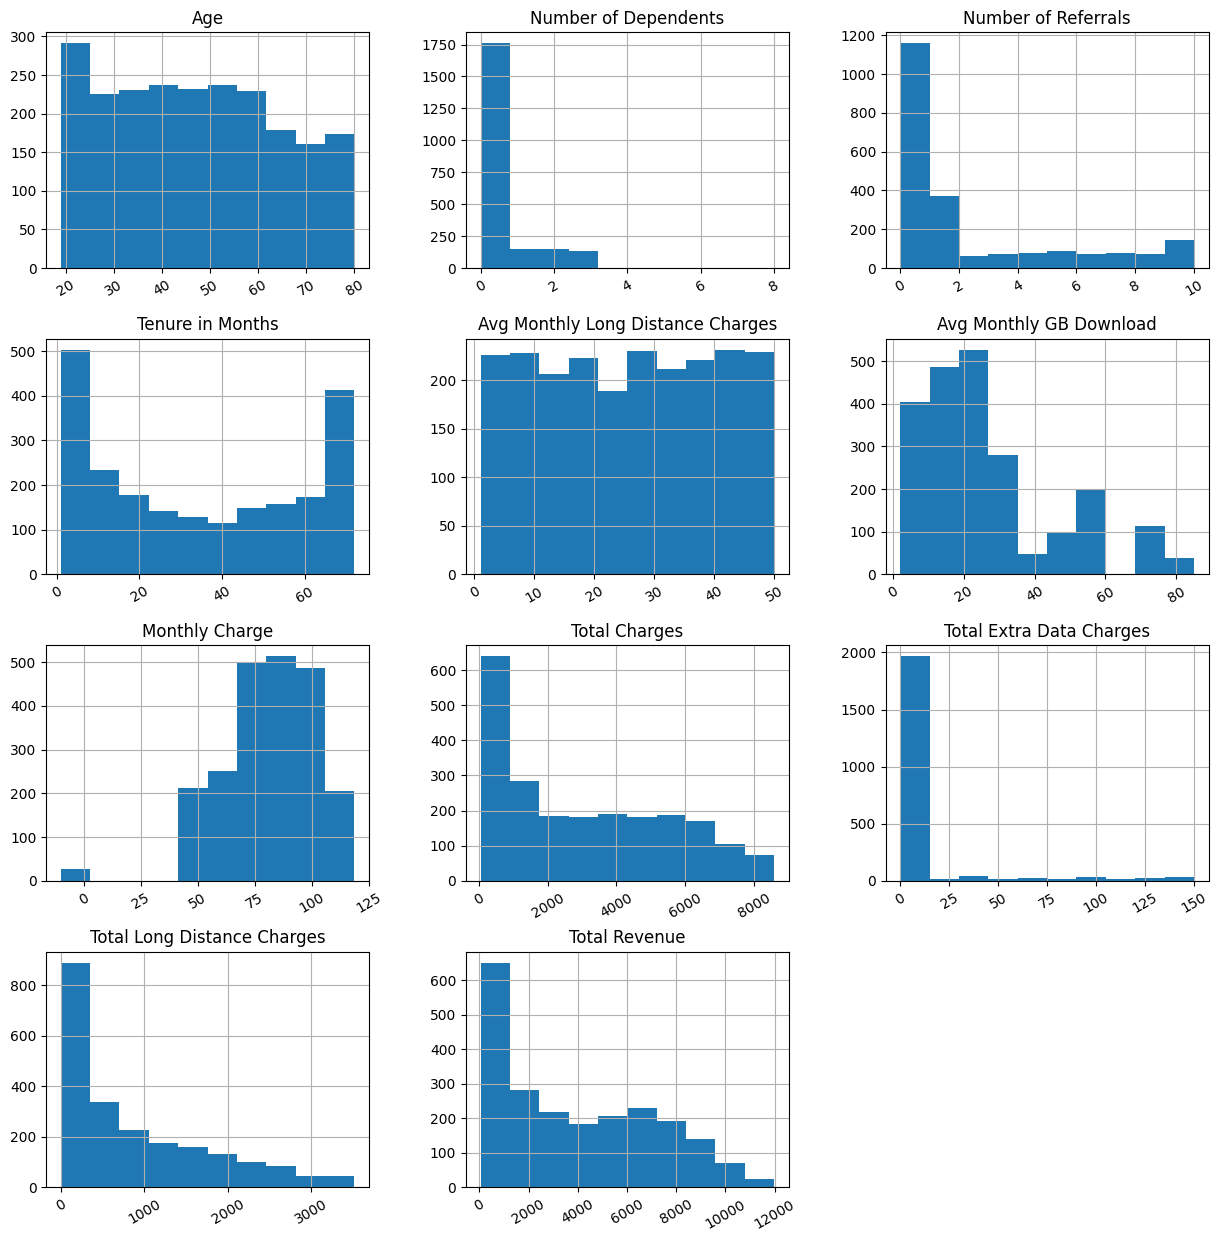

In [23]:
df1.hist(figsize=(15,15), xrot=30)

In [24]:
df1['Age']


2       50
3       78
5       23
6       67
7       52
        ..
7036    53
7038    20
7039    40
7040    22
7041    21
Name: Age, Length: 2194, dtype: int64

In [25]:
import matplotlib.pyplot as plt

Visualizing the number of customers who churned, stayed or joined in the company with a bar plot

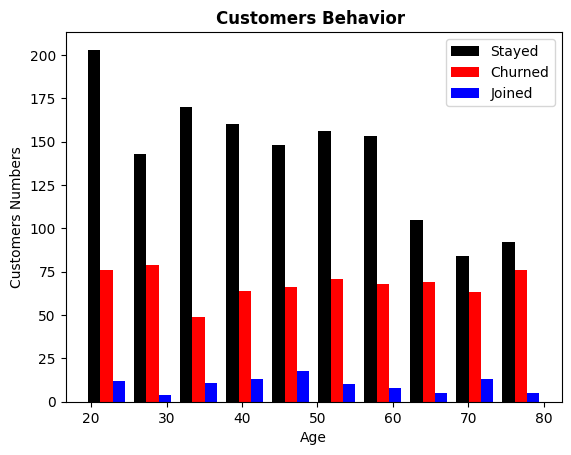

In [26]:
Customer_Stayed=df1[df1['Customer Status']=='Stayed'].Age
Customer_Churned=df1[df1['Customer Status']=='Churned'].Age
Customer_Joined=df1[df1['Customer Status']=='Joined'].Age

plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['black','red','blue'],label=['Stayed','Churned','Joined'])

plt.title('Customers Behavior ',fontweight ="bold")
plt.legend()

In [27]:
import seaborn as sns

 ## Defining Correlation between the columns in the dataset

<Axes: >

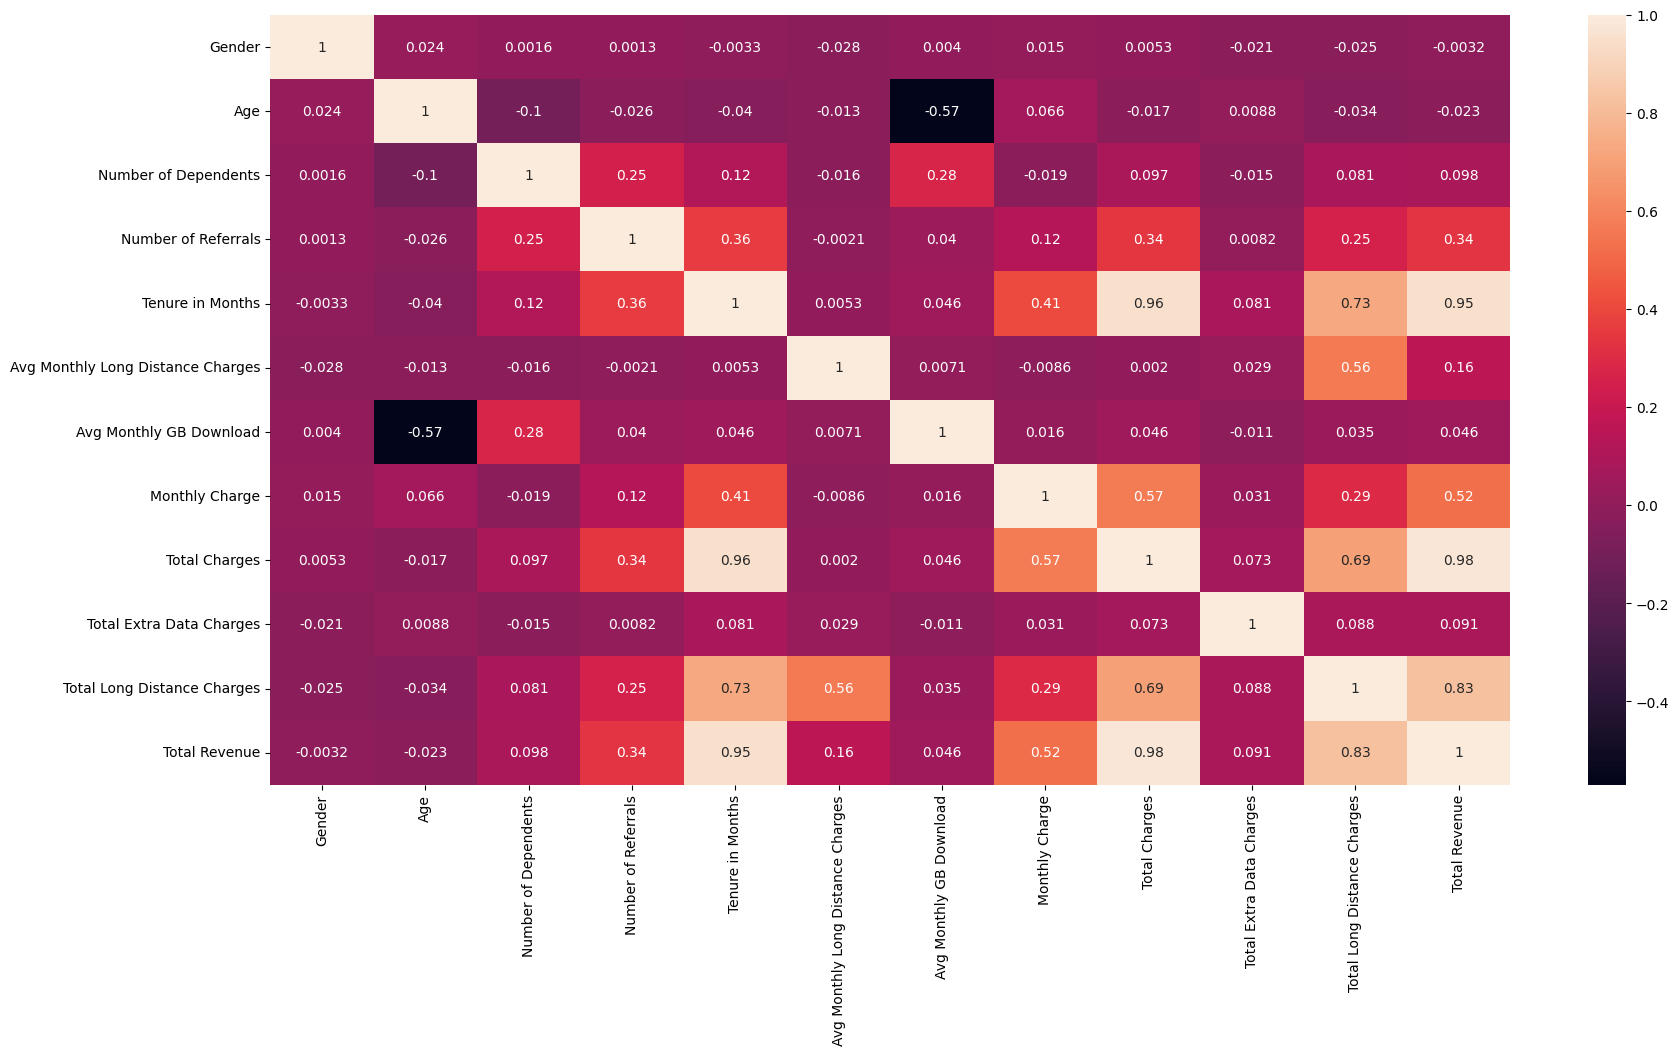

In [31]:
data = df1.select_dtypes(include='number').corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data, annot=True)

Analyzing Outlier in the dataset with respect to customer status

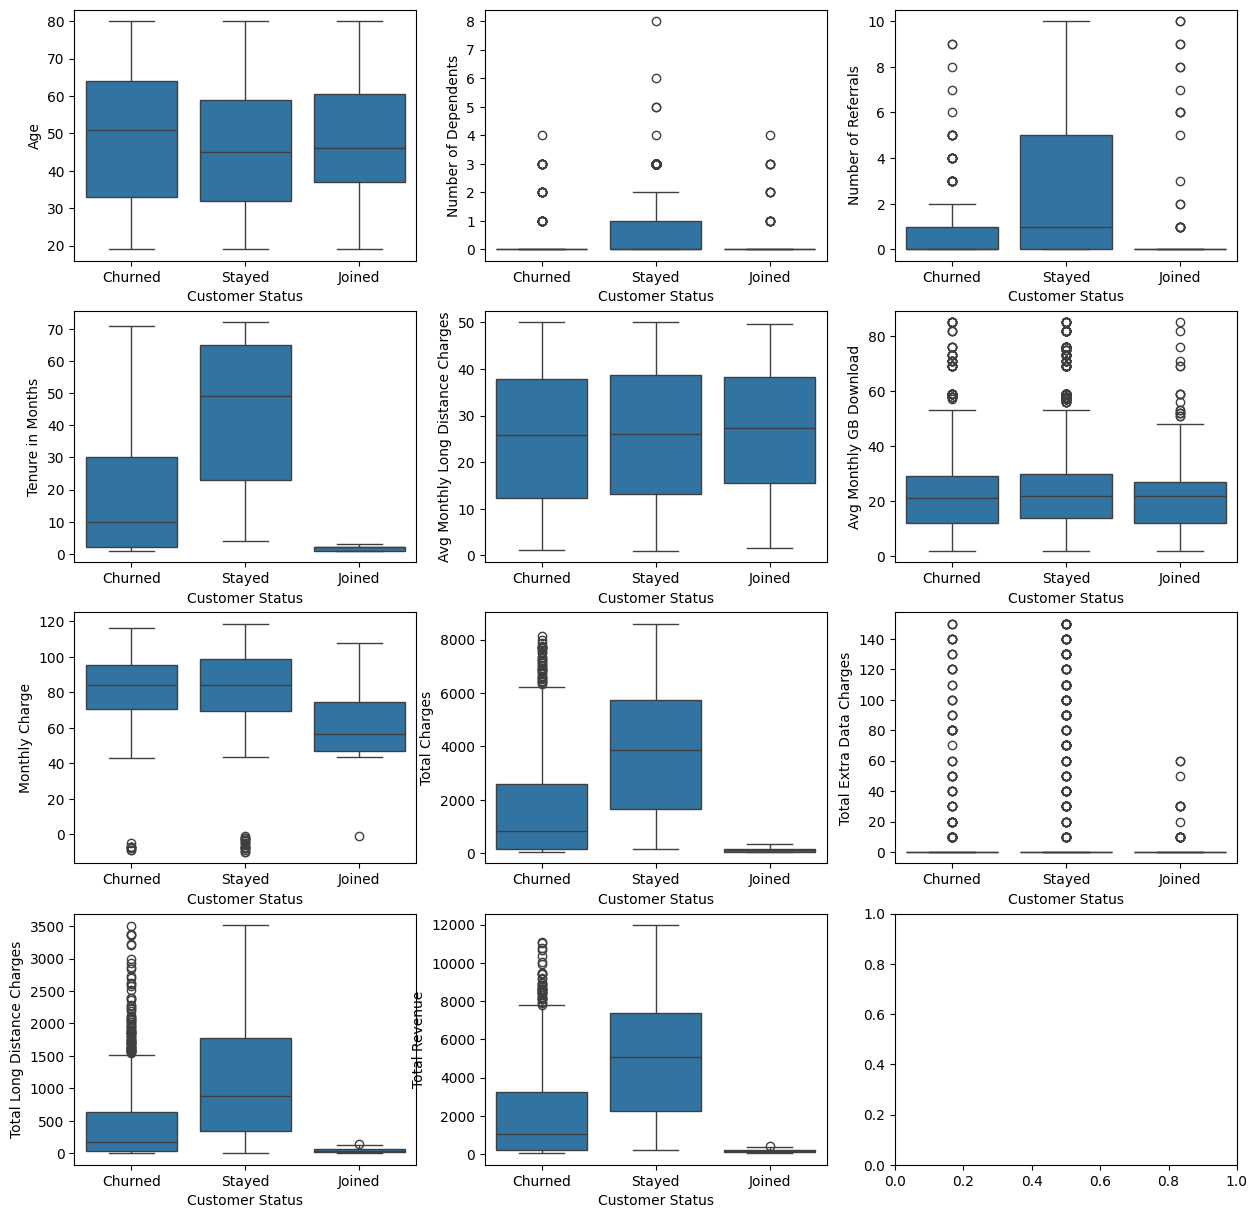

In [32]:
fig, ax = plt.subplots(4,3, figsize = (15,15))
for i, subplot in zip(number_columns, ax.flatten()):
    sns.boxplot(x = 'Customer Status', y = i , data = df1, ax = subplot)

In [33]:
fig = px.density_heatmap(df1, x='Age', y='Total Charges')
fig.show()

In [34]:
df1.columns

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status'],
      dtype='object')

<Axes: xlabel='Customer Status'>

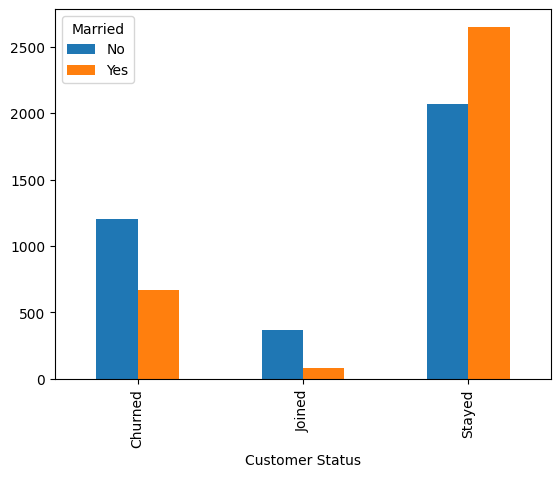

In [35]:
pd.crosstab(df['Customer Status'], df['Married']).plot(kind='bar')

<Axes: xlabel='Customer Status'>

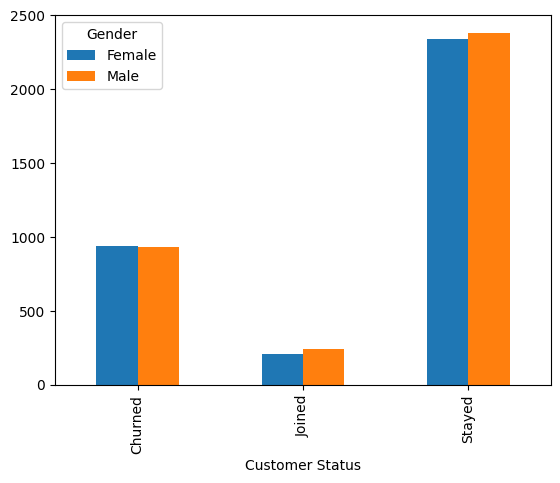

In [36]:
pd.crosstab(df['Customer Status'], df['Gender']).plot(kind='bar')

In [37]:
df1['Payment Method'].unique()

array(['Bank Withdrawal', 'Credit Card', 'Mailed Check'], dtype=object)

Create dictionary with role / data key value pairs

In [38]:
Roles = {}
for j in df1['Payment Method'].unique():
    Roles[j] = df1[df1['Payment Method'] == j]

In [39]:
Roles.keys()

dict_keys(['Bank Withdrawal', 'Credit Card', 'Mailed Check'])

Selecting the rows where the role is 'Credit Card'

In [40]:
Roles['Credit Card']

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
5,1,23,No,3,Midpines,0,9,Offer E,Yes,16.77,...,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0,150.93,722.38,Stayed
7,0,52,Yes,0,Napa,8,63,Offer B,Yes,12.96,...,No,Two Year,Yes,Credit Card,84.65,5377.80,20,816.48,6214.28,Stayed
15,1,58,Yes,2,Woodlake,9,71,Offer A,Yes,27.26,...,Yes,Two Year,Yes,Credit Card,95.75,6849.40,0,1935.46,8784.86,Stayed
30,0,23,Yes,3,Moss Beach,1,37,Offer C,Yes,43.01,...,Yes,One Year,No,Credit Card,91.20,3247.55,0,1591.37,4838.92,Stayed
41,1,20,No,0,Fremont,0,27,Offer C,Yes,48.91,...,Yes,One Year,No,Credit Card,78.20,2078.95,0,1320.57,3399.52,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,1,20,No,0,Los Angeles,0,7,Offer E,Yes,36.49,...,Yes,One Year,Yes,Credit Card,94.05,633.45,0,255.43,888.88,Stayed
7036,1,53,No,0,Hume,0,1,Offer E,Yes,42.09,...,Yes,Month-to-Month,Yes,Credit Card,70.15,70.15,0,42.09,112.24,Churned
7038,1,20,No,0,La Mesa,0,13,Offer D,Yes,46.68,...,Yes,One Year,No,Credit Card,55.15,742.90,0,606.84,1349.74,Stayed
7040,0,22,No,0,Elk,0,2,Offer E,Yes,18.62,...,Yes,Month-to-Month,Yes,Credit Card,50.30,92.75,0,37.24,129.99,Joined


In [41]:
len(Roles)


3

Checking the number of Offers in the dataset

In [42]:
off = df1['Offer'].value_counts()
off


Offer
Offer B    585
Offer E    544
Offer D    392
Offer A    382
Offer C    291
Name: count, dtype: int64

In [43]:
import plotly.graph_objects as go

In [44]:
fig = go.Figure([go.Bar(x=off.index, y=off.values)])
fig.show()

In [45]:
df1_off = Roles['Credit Card'].Offer.value_counts()
df1_off

Offer
Offer B    204
Offer A    171
Offer E    126
Offer D    119
Offer C     96
Name: count, dtype: int64

In [46]:
fig = go.Figure([go.Bar(x= df1_off.index, y=df1_off.values)])
fig.show()

In [47]:
df1 = df1.rename(columns = {'Customer Status':'Customer_Status'})

In [48]:
Roles1 = {}
for k in df1['Customer_Status'].unique():
    Roles1[k] = df1[df1['Customer_Status'] == k]
Roles1.keys()

dict_keys(['Churned', 'Stayed', 'Joined'])

In [49]:
df1_state = Roles1['Stayed'].Offer.value_counts()
df1_state

Offer
Offer B    497
Offer A    348
Offer D    250
Offer C    204
Offer E    115
Name: count, dtype: int64

# Data Modelling

Replacing the Gender column in the dataset with Label Encoding

0 for Female

1 for Male

In [50]:
df1.replace({"Gender":{'Female':0,'Male':1}},inplace=True)

Replacing the columns with 'yes' and 'no' output by Label Encoding

0 for No

1 for Yes

In [51]:
yes_and_no=[  'Paperless Billing', 'Unlimited Data', 
       'Streaming Movies', 'Streaming Music',  'Streaming TV',
       'Premium Tech Support', 'Device Protection Plan', 'Online Backup', 'Online Security',
       'Multiple Lines',  'Married']
for i in yes_and_no:
    df1.replace({'No':0,'Yes':1},inplace=True)

C:\Users\BELDHARI SATVICK\AppData\Local\Temp\ipykernel_21848\547447454.py:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Replacing 'Phone Service' with '1'

In [52]:
df1.replace({"Phone Service":{'Yes':1}},inplace=True)

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1.Customer_Status = le.fit_transform(df1.Customer_Status)


In [54]:
df1 = pd.get_dummies(data=df1, columns=['Payment Method','Contract','Internet Type','Offer','City'])


In [55]:
cols_to_scale = ['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge', 'Total Charges',
       'Total Extra Data Charges', 'Total Long Distance Charges','Total Revenue']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

## Dealing with Imbalance Data

Dropping the Customer_Status

i.e. The column tht we have to predict and set as a dependent variable

In [56]:
X = df1.drop('Customer_Status',axis='columns')
y = df1['Customer_Status']

In [57]:
X.head(5)

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Woodland Hills,City_Woody,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley
2,0,0.508197,0,0.000,0.0,0.042254,1,0.666462,0,1,...,False,False,False,False,False,False,False,False,False,False
3,0,0.967213,1,0.000,0.1,0.169014,1,0.547386,0,1,...,False,False,False,False,False,False,False,False,False,False
5,1,0.065574,0,0.375,0.0,0.112676,1,0.321691,0,1,...,False,False,False,False,False,False,False,False,False,False
6,1,0.786885,1,0.000,0.1,0.985915,1,0.182598,0,1,...,False,False,False,False,False,False,False,False,False,False
7,0,0.540984,1,0.000,0.8,0.873239,1,0.243873,1,1,...,False,False,False,False,False,False,False,False,False,False


In [58]:
y.head(5)


2    0
3    0
5    2
6    2
7    2
Name: Customer_Status, dtype: int64

# Data Model Building

## Spliiting the data in Training and Test Data

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=5)

In [60]:
len(X_train)

1755

In [61]:
X_train[:10]

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,City_Woodland Hills,City_Woody,City_Wrightwood,City_Yermo,City_Yorba Linda,City_Yorkville,City_Yreka,City_Yuba City,City_Yucaipa,City_Yucca Valley
5086,0,0.213115,0,0.000,0.0,0.126761,1,0.135417,0,1,...,False,False,False,False,False,False,False,False,False,False
1686,1,0.000000,0,0.000,0.0,0.140845,1,0.815768,0,1,...,False,False,False,False,False,False,False,False,False,False
3655,0,0.737705,0,0.000,0.0,0.000000,1,0.154003,1,1,...,False,False,False,False,False,False,False,False,False,False
697,0,0.983607,1,0.000,0.1,0.408451,1,0.959967,1,1,...,False,False,False,False,False,False,False,False,False,False
6685,1,0.721311,0,0.000,0.0,0.478873,1,0.247549,1,1,...,False,False,False,False,False,False,False,False,False,False
5617,1,0.262295,0,0.000,0.0,0.084507,1,0.367034,1,1,...,False,False,False,False,False,False,False,False,False,False
2938,0,0.098361,0,0.000,0.0,0.873239,1,0.443423,1,1,...,False,False,False,False,False,False,False,False,False,False
6323,0,0.688525,0,0.000,0.0,0.000000,1,0.257557,0,1,...,False,False,False,False,False,False,False,False,False,False
3382,0,0.868852,0,0.000,0.0,0.014085,1,0.825368,0,1,...,False,False,False,False,False,False,False,False,False,False
1184,0,0.377049,1,0.375,0.8,0.774648,1,0.813725,1,1,...,False,False,False,False,False,False,False,False,False,False


Importing the required files for the model that is to applied

1. Random Forest Classifier
2. Logistic Regression
3. GaussianNB
4. Decision Tree Classifier
5. XGB Classifier


## Importing Models

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [64]:
model_params = {
     
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }    
    },
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]
            
        }
    },   
}

In [65]:
from sklearn.model_selection import ShuffleSplit

Getting the best_score from the applied models

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

It was concluded that XGB_Classifier was giving us the best_score in the dataset

## Selecting the model with best score for the dataset

In [67]:
reg=XGBClassifier()
reg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [68]:
reg.score(X_test, y_test)

0.826879271070615

We got an accuracy of 80.86 percent in the testing dataset

## Predicting values from the model build to check the accuracy

In [69]:
y_predicted = reg.predict(X_test)
y_predicted[:5]

array([2, 0, 1, 0, 0])

## Verifying the actual values with the predicted values

In [70]:
y_test[:5]

525     2
3086    0
2231    1
5041    0
4165    0
Name: Customer_Status, dtype: int64

## Importing Confusion Matrx 

Text(95.72222222222221, 0.5, 'Truth')

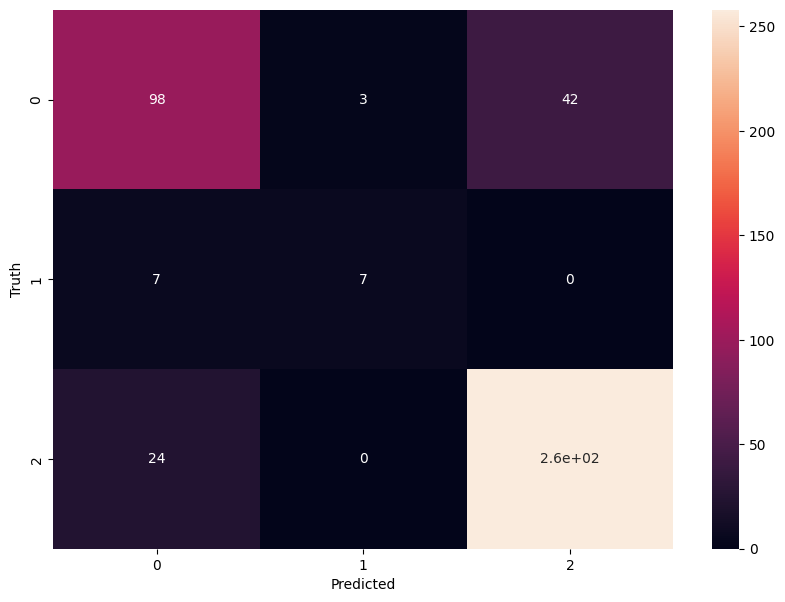

In [71]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Importing Classification Report

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       143
           1       0.70      0.50      0.58        14
           2       0.86      0.91      0.89       282

    accuracy                           0.83       439
   macro avg       0.77      0.70      0.73       439
weighted avg       0.82      0.83      0.82       439



In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.826879271070615